# Week 1 - #02 Text Embedding

[Word2Vec Explaination](https://jalammar.github.io/illustrated-word2vec/)

[Genshim Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html)

- Word Embedding
- Word2Vec
- Average word2vec
- Doc2Vec



## Assignment

Implement Word2Vec on a text dataset and report the embeddings visualization.

Dataset: https://github.com/NTT123/viwik18

In [1]:
pip install Word2Vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 673.5 kB/s eta 0:00:00 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for Word2Vec: filename=word2vec-0.11.1-py2.py3-none-any.whl size=111799 sha256=3b958299ed16954a8299517900eb8d20e1d7b622a498bf1e31e6bea39a76d1c4
  Stored in directory: /Users/xuannguyet/Library/Caches/pip/wheels/53/1f/b2/ff3d47b2a8bd249985b0c59210004a85d70ec90bbcff8aaa93
Successfully built Word2Vec
Note: you may need to restart the kernel to use updated packages.


## Import dataset

In [3]:
!git clone https://github.com/NTT123/viwik18

Cloning into 'viwik18'...
remote: Enumerating objects: 161, done.
remote: Total 161 (delta 0), reused 0 (delta 0), pack-reused 161 (from 1)
Receiving objects: 100% (161/161), 453.04 MiB | 8.79 MiB/s, done.
Resolving deltas: 100% (29/29), done.
Updating files: 100% (13/13), done.


In [ ]:
%cd viwik18

/Users/xuannguyet/Documents/uni/sudocode2025/Week 1 - Text Preprocessing and Text Embedding/viwik18


In [5]:
!cat dataset/viwik18_* > viwik18.txt

In [6]:
with open('viwik18.txt', 'r', encoding='utf-8') as f:
    text = f.read()

print(text[:1000])

trang chính  internet society  internet society hay isoc là một tổ chức quốc tế hoạt động phi lợi nhuận phi chính phủ và bao gồm các thành viên có trình độ chuyên ngành tổ chức này chú trọng đến tiêu chuẩn giáo dục và các vấn đề về chính sách với trên một bốn năm tổ chức thành viên và sáu năm không không không thành viên cá nhân isoc bao gồm những con người cụ thể trong cộng đồng internet mọi chi tiết có thể tìm thấy tại website của isoc   internet society nằm ở gần thủ đô washington dc hoa kỳ và geneva thụy sĩ số hội viên của nó bao gồm hơn một bốn năm tổ chức thành viên và hơn sáu năm không không không cá nhân thành viên còn có thể tự lập một chi nhánh của tổ chức tùy theo vị trí hoặc sở thích hiện nay tổ chức có tới chín không chi nhánh trên toàn thế giới   nhiệm vụ và mục đích hoạt động  bảo đảm cổ vũ cho sự phát triển mở rộng và sử dụng internet được thuận lợi nhất cho mọi người trên toàn thế giới   xem thêm   lịch sử internet  liên kết ngoài   isoc việt nam  trang chủ toàn cầu  i

In [14]:
len(text)

725975404

## Text Preprocessing

In [12]:
import re
import json
import csv
import time
from underthesea import word_tokenize

In [7]:
class TextProcessor:
    def __init__(self, stopwords=None, vectorizer_flag=True):
        self.stopwords = stopwords if stopwords else set()
        self.vectorizer_flag = vectorizer_flag
        
    def normalize(self, text):
        """
        Normalize and cleaning raw text
        """
        text = text.lower() # Lowercase

        text = re.sub(r'<.*?>', '', text) # Remove HTML tags
        
        # Remove URLs like http/www & domains like .com, .vn, .net, ...
        text = re.sub(r'http\S+|www\S+', ' ', text) 
        text = re.sub(r'\b[\w-]+\.(?:com|vn|net|org|info|gov|edu)(?:\.[a-z]{2})?\b', ' ', text)
        
        text = re.sub(r'\d+', ' ', text) # Remove digits
        text = re.sub(r'[^\w\s]', ' ', text) # Remove punctuation
        text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespaces

        return text
    
    def tokenize(self, text):
        """Tokenization using underthesea library"""
        return word_tokenize(text, format="list")
    
    def remove_stopwords(self, tokens):
        """Stop words removal"""
        return [word for word in tokens if word not in self.stopwords]

    def process(self, text):
        """
        Process completely one document.
        1. Lowercase and Cleaning text using RegEx
        2. Tokenization using underthesea library
        3. Remove stopwords
        4. Treat vectorizer flag
        """

        print("Loading normalization...")
        text = self.normalize(text)
        print("Loading tokenization...")
        tokens = self.tokenize(text)
        print("Loading stopwords removal...")
        tokens = self.remove_stopwords(tokens)
        
        if self.vectorizer_flag:
            return ' '.join(tokens)
        else:
            return tokens

In [ ]:
stopwords_path = 'vietnamese-stopwords.txt'
with open(stopwords_path, 'r', encoding='utf-8') as f:
    stopwords = set([line.strip() for line in f if line.strip()])

In [15]:
text_processor = TextProcessor(stopwords=stopwords, vectorizer_flag=False)
processed_text = text_processor.process(text[:10000000])

Loading normalization...
Loading tokenization...
Loading stopwords removal...


In [21]:
print(f"Original text: {len(text[:10000000])} \n{text[:1000]}...\n")
print(f"Processed text: {len(processed_text)} \n{processed_text[:100]}...\n")

Original text: 10000000 
trang chính  internet society  internet society hay isoc là một tổ chức quốc tế hoạt động phi lợi nhuận phi chính phủ và bao gồm các thành viên có trình độ chuyên ngành tổ chức này chú trọng đến tiêu chuẩn giáo dục và các vấn đề về chính sách với trên một bốn năm tổ chức thành viên và sáu năm không không không thành viên cá nhân isoc bao gồm những con người cụ thể trong cộng đồng internet mọi chi tiết có thể tìm thấy tại website của isoc   internet society nằm ở gần thủ đô washington dc hoa kỳ và geneva thụy sĩ số hội viên của nó bao gồm hơn một bốn năm tổ chức thành viên và hơn sáu năm không không không cá nhân thành viên còn có thể tự lập một chi nhánh của tổ chức tùy theo vị trí hoặc sở thích hiện nay tổ chức có tới chín không chi nhánh trên toàn thế giới   nhiệm vụ và mục đích hoạt động  bảo đảm cổ vũ cho sự phát triển mở rộng và sử dụng internet được thuận lợi nhất cho mọi người trên toàn thế giới   xem thêm   lịch sử internet  liên kết ngoài   isoc việt n

In [18]:
# save to file
output_path = 'processed_text.json'
with open(output_path, 'w', encoding='utf-8') as f:
    json.dump(processed_text, f, ensure_ascii=False, indent=2)

In [29]:
# split tokens into smaller chunks with lengths 10 words
def chunk_text(tokens, chunk_size=15):
    for i in range(0, len(tokens), chunk_size):
        yield tokens[i:i + chunk_size]

tokens = processed_text   # list các từ sau khi tokenize
sentences = list(chunk_text(tokens, chunk_size=15))
print(sentences[:10])

[['trang', 'internet', 'society', 'internet', 'society', 'isoc', 'tổ chức', 'quốc tế', 'hoạt động', 'phi lợi nhuận', 'phi chính phủ', 'bao gồm', 'thành viên', 'trình độ', 'chuyên ngành'], ['tổ chức', 'chú trọng', 'tiêu chuẩn', 'giáo dục', 'chính sách', 'bốn', 'tổ chức', 'thành viên', 'sáu', 'thành viên', 'isoc', 'bao gồm', 'con người', 'cộng đồng', 'internet'], ['chi tiết', 'website', 'isoc', 'internet', 'society', 'nằm', 'thủ đô', 'washington', 'dc', 'hoa kỳ', 'geneva', 'thụy sĩ', 'hội viên', 'bao gồm', 'bốn'], ['tổ chức', 'thành viên', 'sáu', 'thành viên', 'tự lập', 'chi nhánh', 'tổ chức', 'tùy', 'sở thích', 'tổ chức', 'chín', 'chi nhánh', 'toàn', 'thế giới', 'nhiệm vụ'], ['mục đích', 'hoạt động', 'bảo đảm', 'cổ vũ', 'phát triển', 'mở rộng', 'internet', 'thuận lợi', 'toàn', 'thế giới', 'lịch sử', 'internet', 'liên kết', 'isoc', 'việt nam'], ['trang chủ', 'toàn cầu', 'ietf and', 'the', 'internet', 'society', 'internet', 'engineering', 'task', 'force', 'isoc', 'vint', 'cerf', 'tám', 's

## Word2Vec

In [19]:
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser

### Bigram Phrase Detection

In [31]:
bigram = Phrases(sentences=sentences, min_count=5, threshold=5)
bigram_phraser = Phraser(bigram)
bigram_sentences = [bigram_phraser[sent] for sent in sentences]
print(bigram_sentences[:5])

[['trang', 'internet', 'society', 'internet', 'society', 'isoc', 'tổ chức_quốc tế', 'hoạt động', 'phi lợi nhuận', 'phi chính phủ', 'bao gồm', 'thành viên', 'trình độ', 'chuyên ngành'], ['tổ chức', 'chú trọng', 'tiêu chuẩn', 'giáo dục', 'chính sách', 'bốn', 'tổ chức', 'thành viên', 'sáu', 'thành viên', 'isoc', 'bao gồm', 'con người', 'cộng đồng', 'internet'], ['chi tiết', 'website', 'isoc', 'internet', 'society', 'nằm', 'thủ đô', 'washington_dc', 'hoa kỳ', 'geneva', 'thụy sĩ', 'hội viên', 'bao gồm', 'bốn'], ['tổ chức', 'thành viên', 'sáu', 'thành viên', 'tự lập', 'chi nhánh', 'tổ chức', 'tùy', 'sở thích', 'tổ chức', 'chín', 'chi nhánh', 'toàn_thế giới', 'nhiệm vụ'], ['mục đích', 'hoạt động', 'bảo đảm', 'cổ vũ', 'phát triển', 'mở rộng', 'internet', 'thuận lợi', 'toàn_thế giới', 'lịch sử', 'internet', 'liên kết', 'isoc', 'việt nam']]


### Build viwik18 Word2Vec model in gensin

In [34]:
# Initializing Word2Vec model
model = Word2Vec(
    vector_size=100,   
    window=5,          
    min_count=3,       
    workers=2,         # CPU core
    sg=1,              # Skip-gram
    sample=1e-3,
    negative=10,
    epochs=5
)

### Train Word2Vec model

In [35]:
# Training progress
## Build vocab
start_time = time.time()
model.build_vocab(sentences, progress_per=10000)
print(f"Build vocab done. Time: {time.time() - start_time}")

## Train
start_time = time.time()
model.train(sentences, total_examples=model.corpus_count, epochs=10)
print(f"Train done. Time: {time.time() - start_time}")

# Save model
model.save("word2vec_viwik18_bigram.model")
print("Saved model!")

Build vocab done. Time: 3.04773211479187
Train done. Time: 65.15801787376404
Saved model!


### Inference

In [37]:
model.wv.most_similar(positive=["việt nam"], topn=10)

[('lào campuchia', 0.6838115453720093),
 ('hải phận', 0.68256014585495),
 ('mỹ việt nam', 0.6778901219367981),
 ('hòa phạm', 0.6769779920578003),
 ('tây sa', 0.6728766560554504),
 ('dân chủ nhân dân', 0.6699900031089783),
 ('xã hội chủ nghĩa việt nam', 0.6670286655426025),
 ('nguyễn hữu hạnh', 0.665960967540741),
 ('đảng trưởng', 0.6620796918869019),
 ('công hàm', 0.6550315022468567)]

In [38]:
model.wv["việt nam"][:10]

array([-0.21332608,  0.40293053,  0.12674811, -0.03923444,  0.22418903,
       -0.34143552,  0.00764412,  0.23634203, -0.01601595, -0.18556549],
      dtype=float32)

In [40]:
model.wv.most_similar(positive=["tổ chức"], topn=10)

[('tham dự', 0.6030881404876709),
 ('phi chính phủ', 0.5935859084129333),
 ('wicca', 0.583457350730896),
 ('liên hợp quốc', 0.5823192596435547),
 ('carnaval', 0.5807996988296509),
 ('phi lợi nhuận', 0.5787985324859619),
 ('icc', 0.5784725546836853),
 ('tổng hội', 0.5691201090812683),
 ('bộ ngành', 0.5599329471588135),
 ('đa phương', 0.5580058693885803)]

### Visualization

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [44]:
# load trained model
model = Word2Vec.load('word2vec_viwik18_bigram.model')

In [46]:
# words list and their vector embedding
words = list(model.wv.index_to_key)
embedding_vectors = np.array([model.wv[word] for word in words])

In [51]:
top_20_words = pd.DataFrame([(word, model.wv.get_vecattr(word, "count")) for word in words[:20]], columns=['word', 'count'])
print(top_20_words)

          word  count
0          hai  20110
1         chín  18239
2          bốn  10048
3          tám   9428
4          sáu   8815
5          bảy   8516
6     việt nam   6029
7         tỉnh   2960
8    thành phố   2888
9        thành   2775
10       tiếng   2630
11   phần trăm   2593
12         bắc   2575
13    quốc gia   2477
14         nam   2465
15          mỹ   2384
16    thế giới   2221
17  phát triển   2137
18        miền   2125
19        pháp   2035


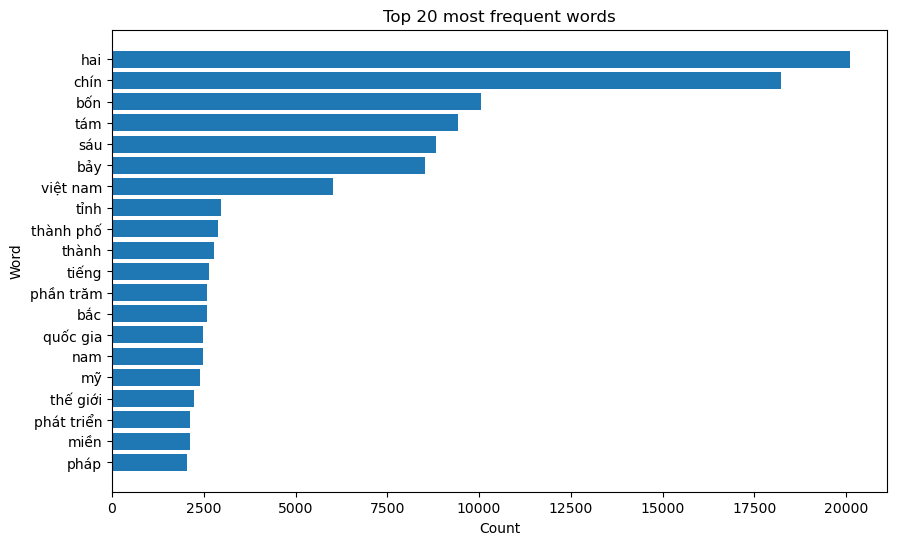

In [55]:
plt.figure(figsize=(10,6))
plt.barh(top_20_words["word"], top_20_words["count"])
plt.xlabel("Count")
plt.ylabel("Word")
plt.title("Top 20 most frequent words")
plt.gca().invert_yaxis() 
plt.show()

### Visualizing with PCA

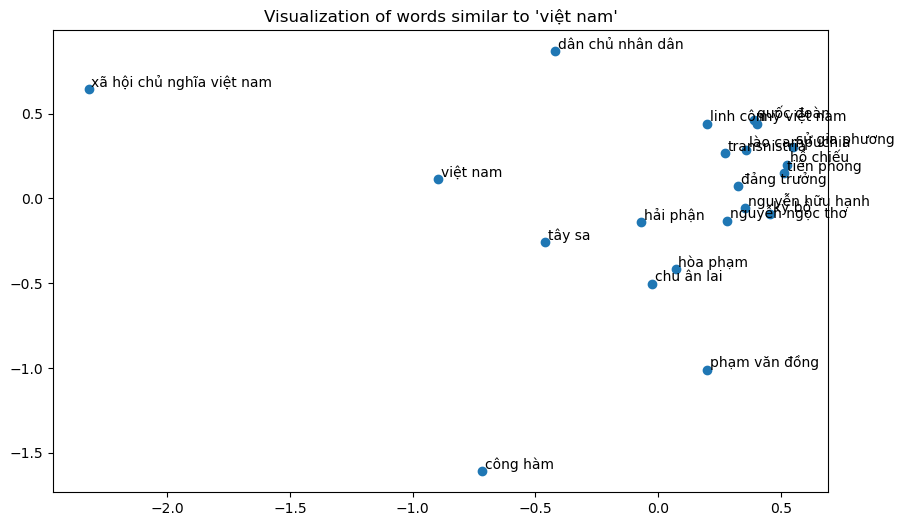

In [60]:
from sklearn.decomposition import PCA

target_word = "việt nam"
similar_words = model.wv.most_similar(target_word, topn=20)

words = [target_word] + [w for w, _ in similar_words]
word_vectors = [model.wv[w] for w in words]

pca = PCA(n_components=2)
vecs_pca = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 6))
plt.scatter(vecs_pca[:, 0], vecs_pca[:, 1])

for i, w in enumerate(words):
    plt.annotate(w, xy=(vecs_pca[i, 0], vecs_pca[i, 1]),
                 xytext=(2, 2), textcoords="offset points")

plt.title(f"Visualization of words similar to '{target_word}'")
plt.show()

### Visualizing with TSNE

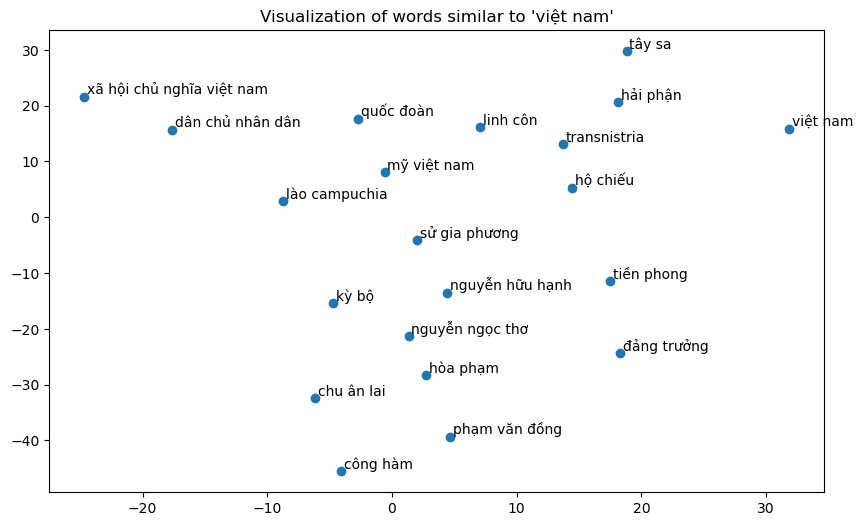

In [63]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=5)
vecs_tsne = tsne.fit_transform(np.array(word_vectors))

plt.figure(figsize=(10, 6))
plt.scatter(vecs_tsne[:, 0], vecs_tsne[:, 1])

for i, w in enumerate(words):
    plt.annotate(w, xy=(vecs_tsne[i, 0], vecs_tsne[i, 1]),
                 xytext=(2, 2), textcoords="offset points")

plt.title(f"Visualization of words similar to '{target_word}'")
plt.show()

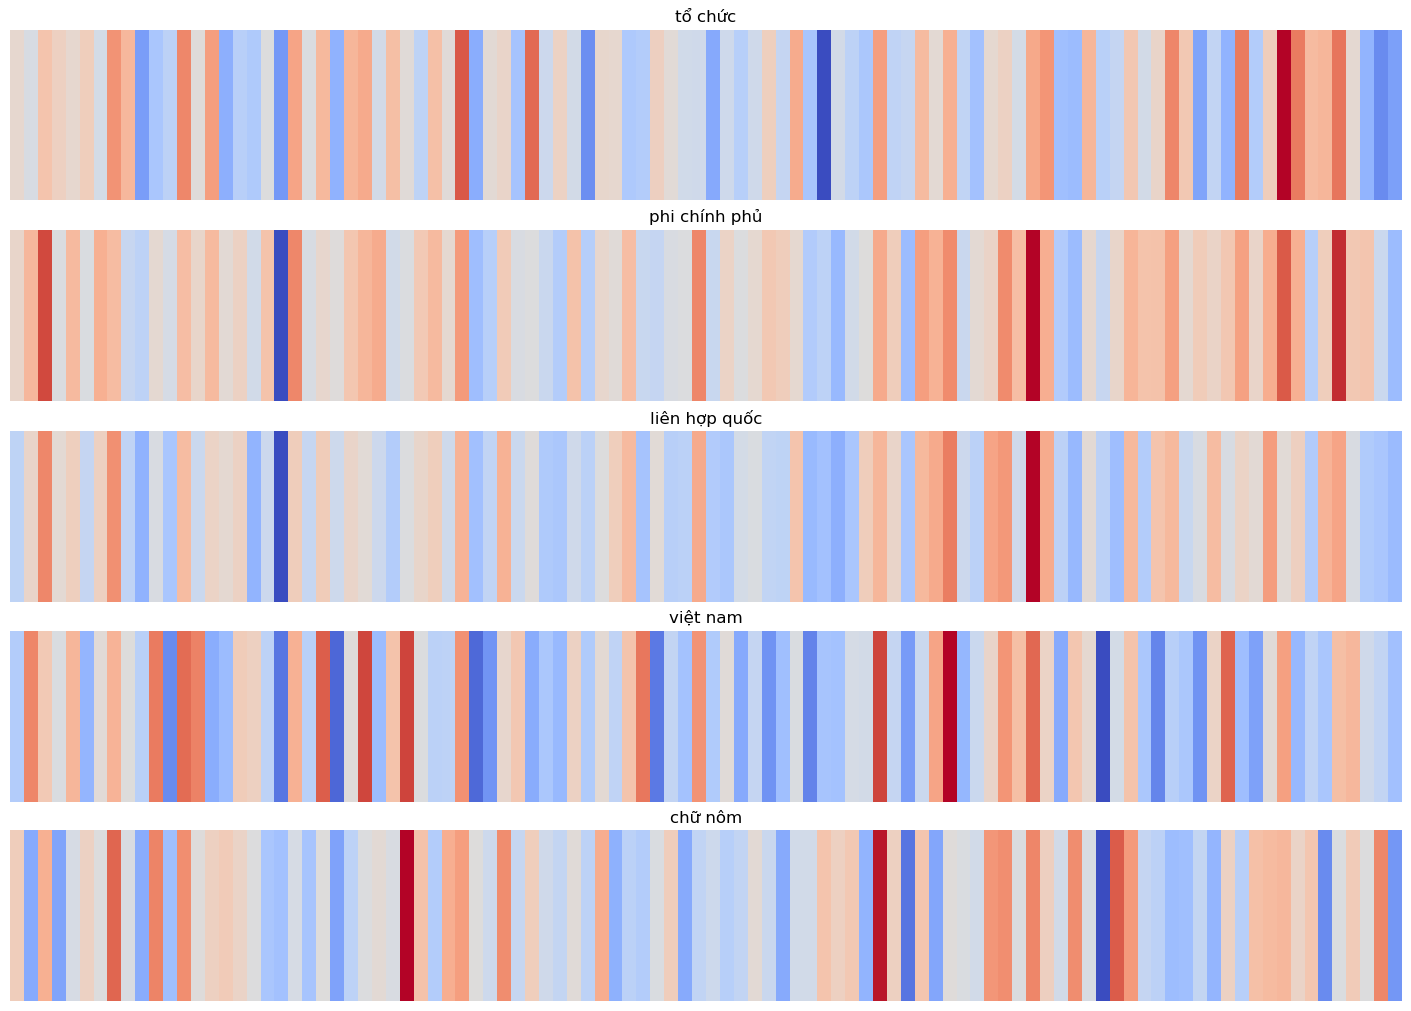

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Ví dụ chọn nhóm từ cùng chủ đề
words = ["tổ chức", "phi chính phủ", "liên hợp quốc", "việt nam", "chữ nôm"]

# Lấy vector embedding của từng từ
vectors = np.array([model.wv[w] for w in words])
scaled = (vectors - vectors.min()) / (vectors.max() - vectors.min())

fig, axs = plt.subplots(len(words), 1, figsize=(14, 2*len(words)), constrained_layout=True)
cmap = plt.get_cmap('coolwarm')

for i, w in enumerate(words):
    axs[i].imshow([scaled[i]], aspect='auto', cmap=cmap)
    axs[i].set_title(w)
    axs[i].axis('off')

plt.show()
